In [20]:
"""
Code for accommodating the graph-making need of ECON 3229-2 Money, Banking, and Financial Systems 

University of Missouri-Columbia

Fangda Wang

Fall 2017


https://github.com/vitanova
"""

# I work as teaching assistant for this course, and am told to generate/update lots of figures of macroeconomic
# and monetary time series, mainly from the FRED:
# https://fred.stlouisfed.org/
# although the website has the functionality to plot figures, it's elementary and cannot satisify this course's demand
# and, I am tired of handling excel, since each time I have to build the procedure from the begining
# moreover, there are a number of similar tasks in the foreseeable future, so I decide to write some code 
# to automize the procedure, before it is too late

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#this is a third-party api for manipulating fred data
from fred import Fred

#first, use the api key to get access to fred, all data in dictionary format
#replace with your own key
fr = Fred(api_key='4bba000775edea91bc01729d217cf3da', response_type='dict')

#now, use the series id to get observations
cpi=fr.series.observations(series_id="USNUM") ## <--- make change: series_id
aaa=fr.series.observations(series_id="MICH") ## <--- make change
nber=fr.series.observations(series_id="USREC") ## <--- make change

#convert the dictionary data to data frame
CPI=pd.DataFrame.from_dict(cpi)
AAA=pd.DataFrame.from_dict(aaa)
NBER=pd.DataFrame.from_dict(nber)

#rename columns
CPI.columns = 'date', 'end', 'start', 'cpi' ## <--- make change: series_name
AAA.columns = 'date', 'end', 'start', 'mich' ## <--- make change
NBER.columns = 'date', 'end', 'start', 'nber'## <--- make change

#merge the two tables and use date as key
al=pd.merge(CPI, AAA, how='left', on='date')
al=pd.merge(al, NBER, how='left', on='date')
al=al.drop('end_x', axis=1)
al=al.drop('start_x', axis=1)
al=al.drop('end_y', axis=1)
al=al.drop('start_y', axis=1)
al=al.drop('end', axis=1)
al=al.drop('start', axis=1)
al=al.drop(al.index[[0,1,2,3,4]])
al.head()

C:\Anaconda3\lib\site-packages\fred\helpers\__init__.py:36: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  frame = frame.convert_objects(convert_numeric=True)
C:\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


,date,cpi,mich,nber
5,1985-04-01,14358,3.3,0
6,1985-07-01,14344,2.8,0
7,1985-10-01,14280,3.3,0
8,1986-01-01,14252,2.9,0
9,1986-04-01,14182,2.4,0


In [21]:
#transform date format from yyyy-mm-dd to yyyy Qq
def tran_date(xx):
    return str(xx.year) + " Q" + str(1+int(xx.month/3))
al['new_date']=al.apply(lambda row: tran_date(row['date']), axis=1)
al['new_nber']=20000*al['nber']
al=al.rename(columns={'cpi': 'usnum'})
al['zero']=0
al.tail()

,date,usnum,mich,nber,new_date,new_nber,zero
129,2016-04-01,5210,2.8,0,2016 Q2,0,0
130,2016-07-01,5141,2.7,0,2016 Q3,0,0
131,2016-10-01,5083,2.4,0,2016 Q4,0,0
132,2017-01-01,5033,2.6,0,2017 Q1,0,0
133,2017-04-01,4982,2.5,0,2017 Q2,0,0


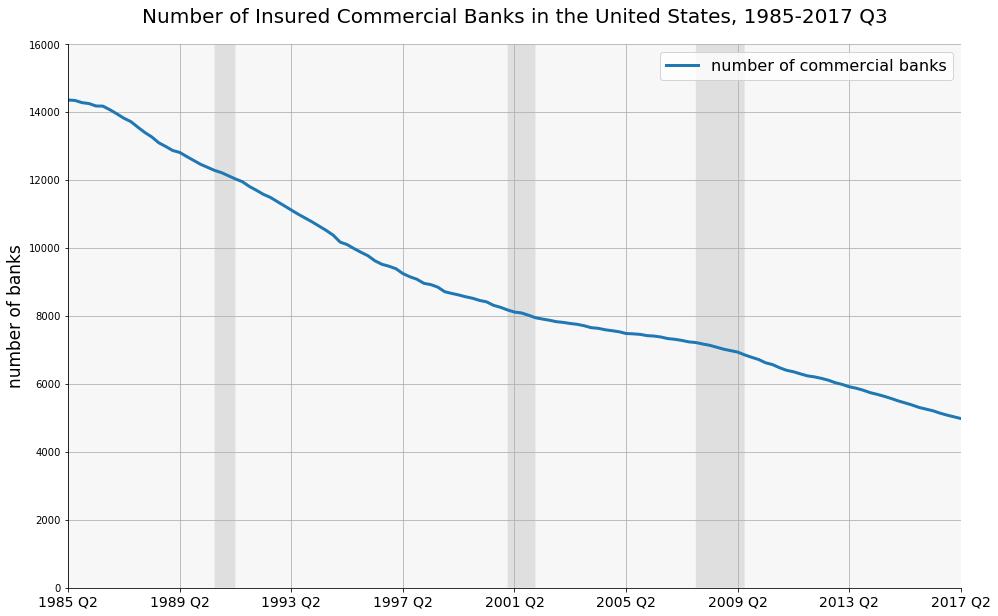

In [23]:
final=al.date.values
fig, ax=plt.subplots(figsize=(16, 10))
ax.plot(final, al['usnum'], label='number of commercial banks', lw=3)

#transform the shaded area into rectangle
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(final, al['new_nber'], al['zero'], facecolor='gray', interpolate=False, transform=trans, alpha=0.2)

#set the horizontal label as transformed data type
ax.set_xlim([al.date[al.index[0]], al.date[al.index[-1]]])
real_date=[]
trans_date=[]
for i in range(9):
    real_date.append(al.date[al.index[16*i]])
    trans_date.append(al.new_date[al.index[16*i]])
ax.set_xticks(real_date)
ax.set_xticklabels(trans_date, fontsize=14)

ax.grid()
ax.set_ylim(0, 16000)
ax.set_ylabel("number of banks", fontsize=17)
ax.legend(loc='best', fontsize=16)
ax.set_title("Number of Insured Commercial Banks in the United States, 1985-2017 Q3", fontsize=20, position=[.5, 1.03])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.06)
plt.show()